<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambles" data-toc-modified-id="Preambles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambles</a></span></li><li><span><a href="#Parameters,-SQUID" data-toc-modified-id="Parameters,-SQUID-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parameters, SQUID</a></span></li><li><span><a href="#Parameters,-transmon" data-toc-modified-id="Parameters,-transmon-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameters, transmon</a></span></li><li><span><a href="#Parameter,-fluxonium" data-toc-modified-id="Parameter,-fluxonium-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parameter, fluxonium</a></span></li></ul></div>

# Preambles

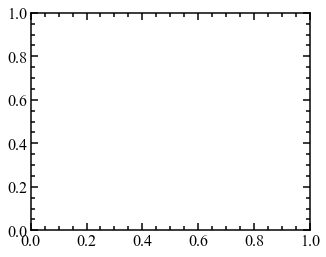

In [2]:
import sys
sys.dont_write_bytecode = True
import time
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_resonator as resonator
from Fluxonium_hamiltonians import qchard_squid as squid
from Fluxonium_hamiltonians import qchard_transmon as transmon
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'

# Parameters, SQUID

In [20]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False


# Parameters of the first fluxonium.
E_L1 = 0.6 # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy
phi_ext1 = np.pi  # external phase shift

# Parameters of the second fluxonium.
E_L2 = 0.75  # inductive energy
#     E_L2 = 1.6  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy
phi_ext2 = np.pi  # external phase shift

# Interaction energy between two fluxoniums.
# E_int n_1 n_2 or E_int phi_1 phi_2.
E_int = 0.2  # when a single value is needed
E_int_range = np.linspace(0, 0.3, 11)  # when a range is needed
coupling = 'charge'  # 'charge' or 'flux'
    

E_Jsum = 10
E_Csquid = 0.25
d = 0.0
nlev_coupler = 5
nlev_charge = 20

qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
coupler = squid.Squid (E_Jsum = E_Jsum, E_C = E_Csquid, d = d, nlev=nlev_coupler, nlev_charge = nlev_charge, phi_ext=0)

print("Qubit A: %s" % (qubit1))
print("Qubit B: %s" % (qubit2))
print("SQUID: %s" % (coupler))

anchor_freq1 = qubit1.freq(0,1)
anchor_freq2 = qubit2.freq(0,1)
coupl_freq = coupler.freq(0,1)

print (anchor_freq1)
print (anchor_freq2)
print (coupl_freq)

Qubit A: A fluxonium qubit with E_L = 0.6 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
Qubit B: A fluxonium qubit with E_L = 0.75 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
SQUID: A SQUID with E_C = 0.25 GHz, and E_Jsum = 10 GHz, and d = 0.0 GHz. The external phase shift is phi_ext/pi = 0.0.
0.29242001060857636
0.388547847923298
6.063469337990629


In [21]:
phi_ext_array = np.linspace(0, 1, 101)
energies = np.zeros((nlev_single*nlev_single*nlev_coupler, len(phi_ext_array)))
n_element = np.zeros(len(phi_ext_array))

g = 0.2
for idx, phi_ext in enumerate(phi_ext_array):
    coupler.phi_ext = phi_ext*2*np.pi
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, g, 'charge'],
                                    [qubit2, coupler, g, 'charge'])
    energies[:, idx] = system.levels()

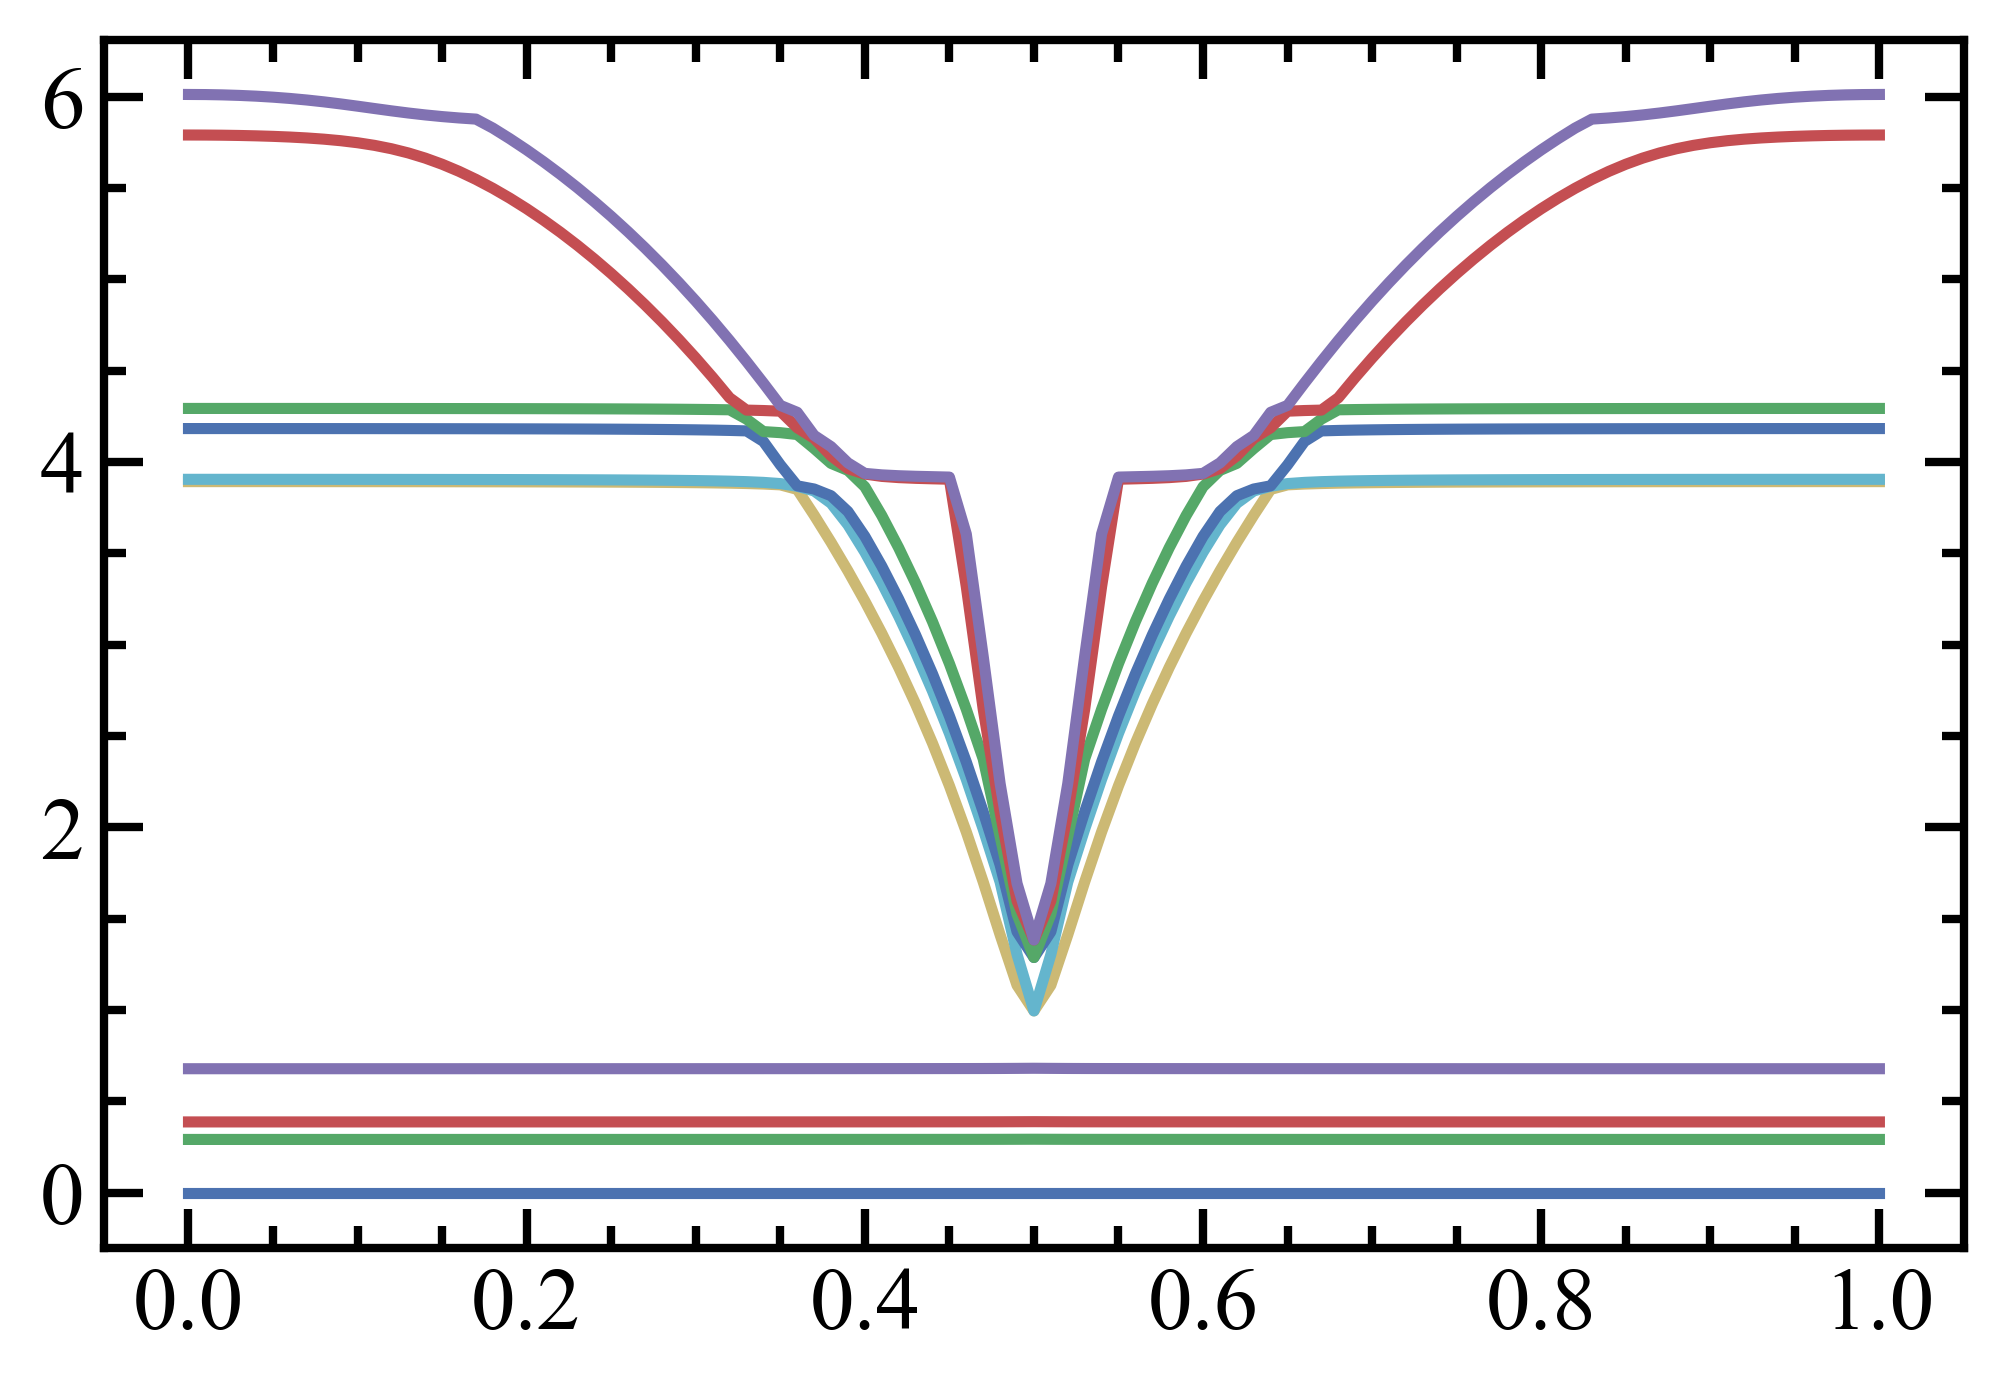

In [22]:
for idx in range(10):
    plt.plot(phi_ext_array, energies[idx, :] - energies[0, :])

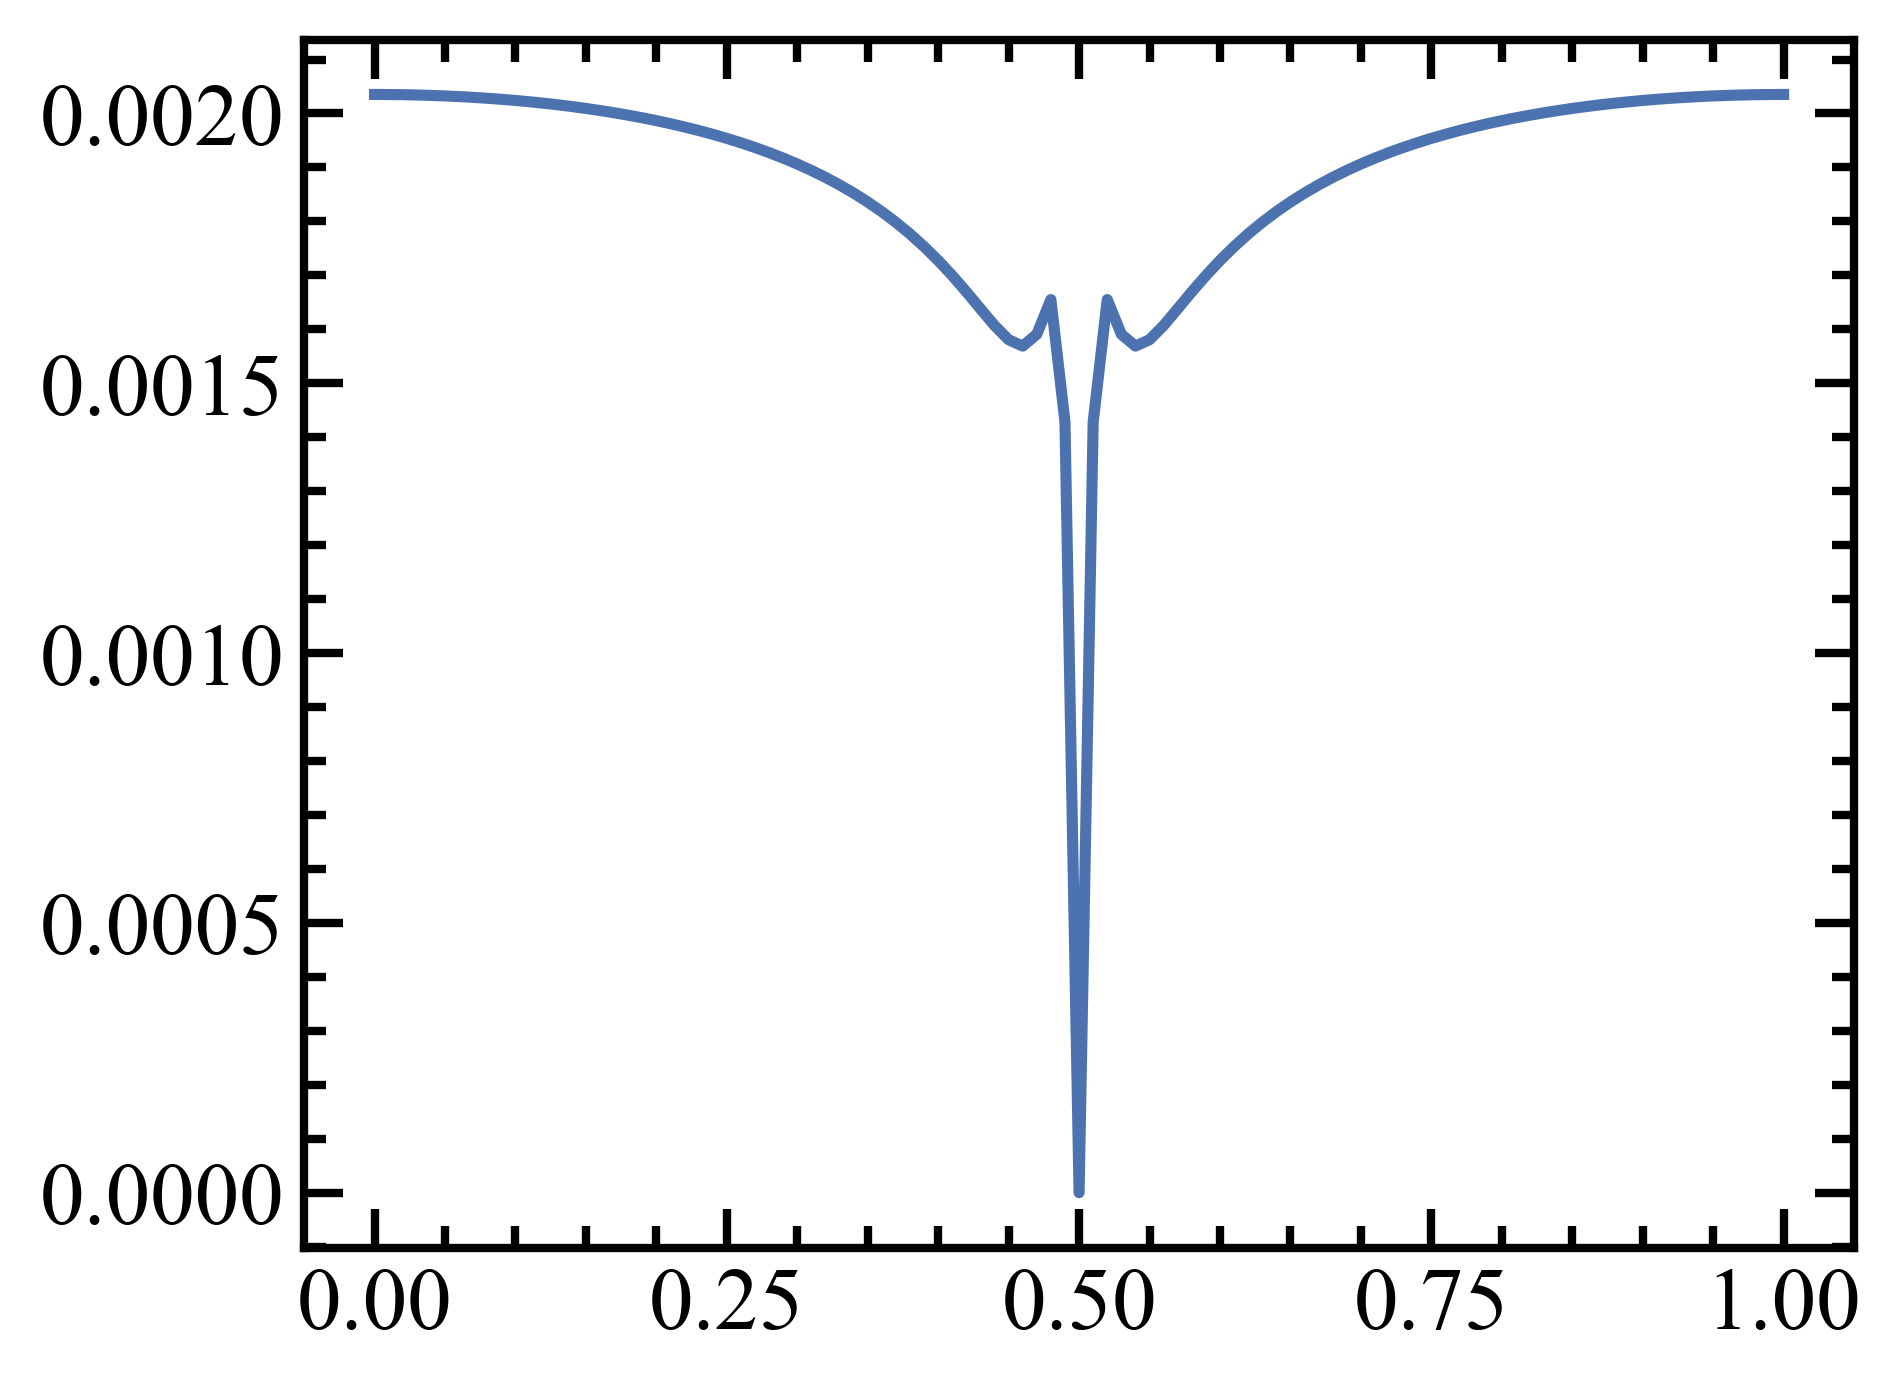

In [23]:
plt.figure(figsize = [5,4])
#zeta_ZZ has unit of GHz here
zeta_ZZ = energies[system.level_label('110'),:] + energies[system.level_label('000'),:] \
- energies[system.level_label('100'), :] - energies[system.level_label('010'), :]

plt.plot(phi_ext_array, abs(zeta_ZZ)*1e3)

# Parameters, transmon

In [39]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False


# Parameters of the first fluxonium.
E_L1 = 0.6 # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 4  # Josephson energy
phi_ext1 = np.pi  # external phase shift

# Parameters of the second fluxonium.
E_L2 = 0.75  # inductive energy
#     E_L2 = 1.6  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 4  # Josephson energy
phi_ext2 = np.pi  # external phase shift

# Interaction energy between two fluxoniums.
# E_int n_1 n_2 or E_int phi_1 phi_2.
E_int = 0.2  # when a single value is needed
E_int_range = np.linspace(0, 0.3, 11)  # when a range is needed
coupling = 'charge'  # 'charge' or 'flux'
    

omega_q = 6
alpha = -0.3

qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
coupler = transmon.TransmonSimple(omega_q = omega_q, alpha = alpha, nlev = nlev_single)

print("Qubit A: %s" % (qubit1))
print("Qubit B: %s" % (qubit2))
print("Coupler: %s" % (coupler))

anchor_freq1 = qubit1.freq(0,1)
anchor_freq2 = qubit2.freq(0,1)
coupl_freq = coupler.freq(0,1)

print (anchor_freq1)
print (anchor_freq2)
print (coupl_freq)

Qubit A: A fluxonium qubit with E_L = 0.6 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
Qubit B: A fluxonium qubit with E_L = 0.75 GHz, E_C = 1.0 GHz, and E_J = 4 GHz. The external phase shift is phi_ext/pi = 1.0.
Coupler: A transmon qubit with omega_q = 6 GHz and  alpha = -0.3 GHz
0.29242001060857636
0.388547847923298
6.0


In [42]:
freq_array = np.linspace(2,8,61)
energies = np.zeros((nlev_single**3, len(freq_array)))

g = 0.4
for idx, freq in enumerate(freq_array):
    coupler.omega_q = freq
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, g, 'JC-charge'],
                                    [qubit2, coupler, g, 'JC-charge'],
                                   [qubit1, qubit2, 0.0, 'charge'])
    energies[:, idx] = system.levels()

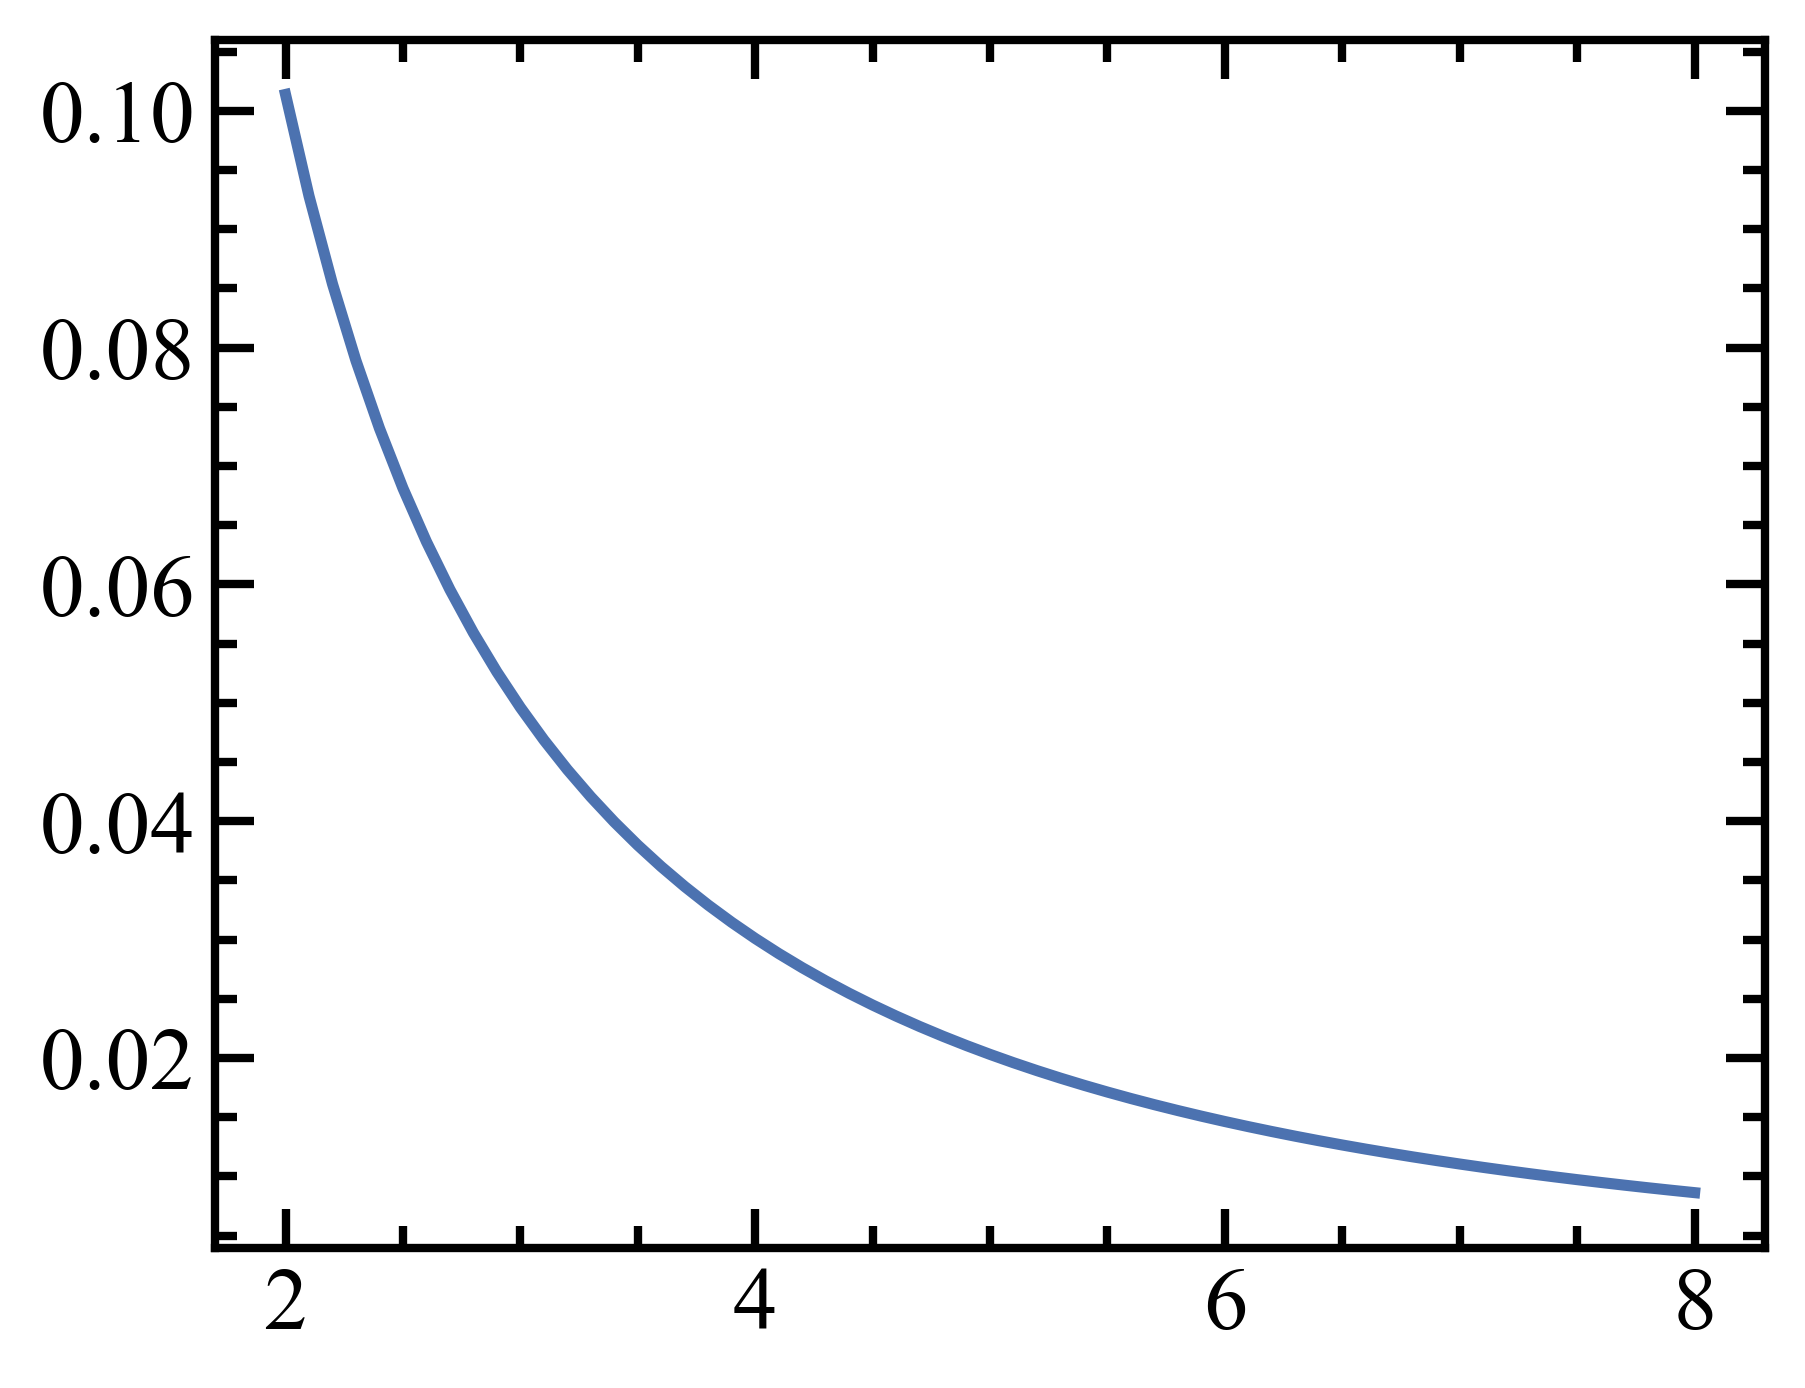

In [43]:
plt.figure(figsize = [5,4])
#zeta_ZZ has unit of GHz here
zeta_ZZ = energies[system.level_label('110'),:] + energies[system.level_label('000'),:] \
- energies[system.level_label('100'), :] - energies[system.level_label('010'), :]

plt.plot(freq_array, abs(zeta_ZZ)*1e3)
# plt.ylim([0,0.03])

(0.0, 5.0)

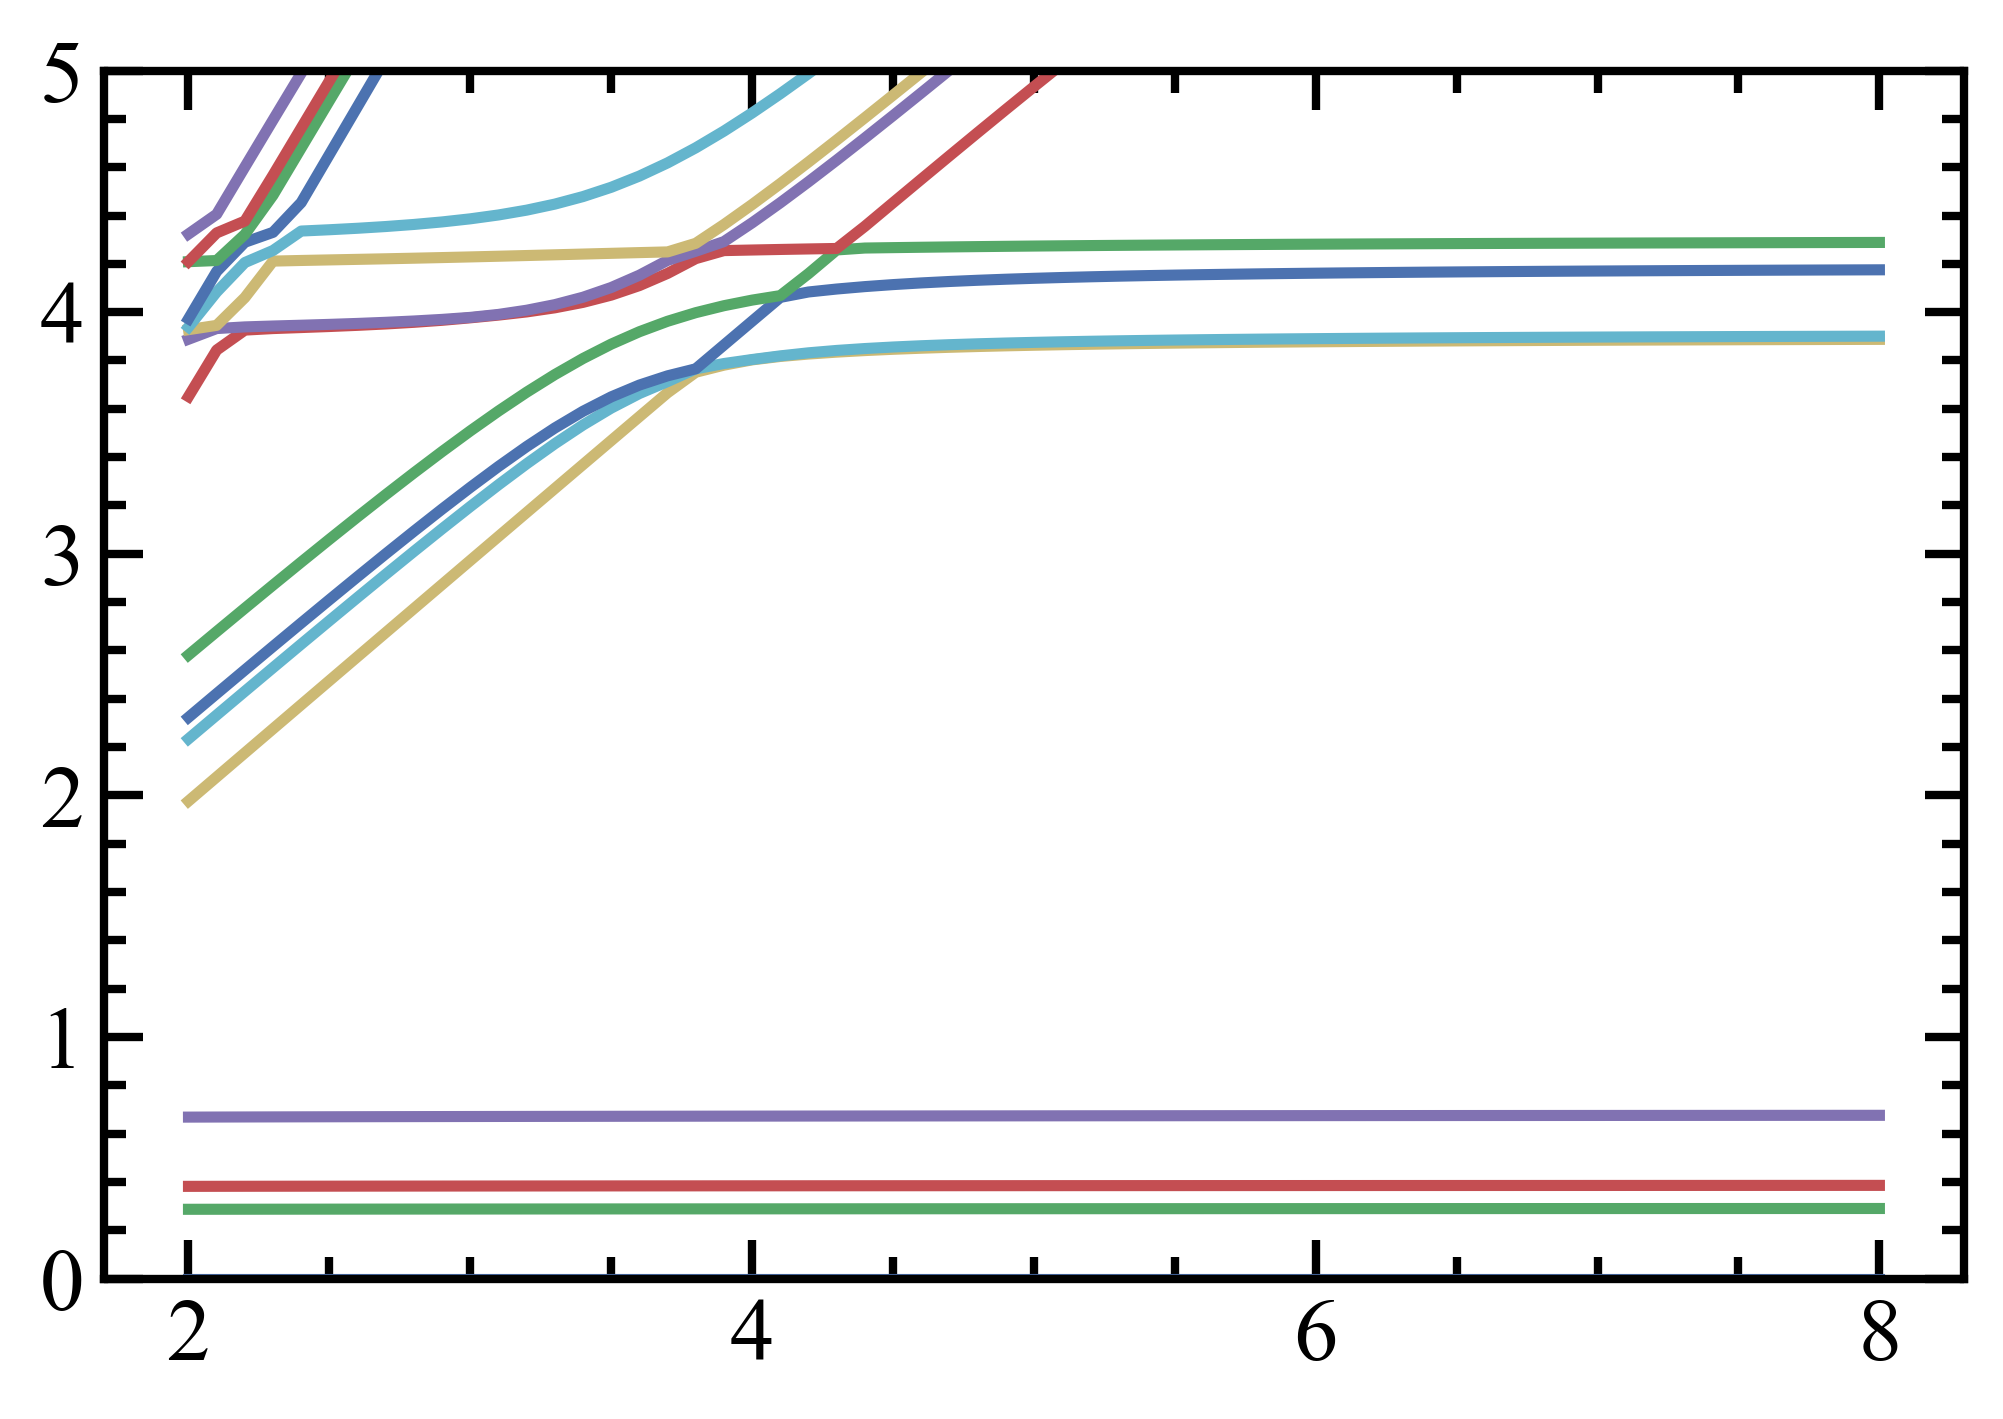

In [46]:
for idx in range(nlev_single**3):
    plt.plot(freq_array, energies[idx, :]-energies[0, :])
plt.ylim([0,5])

# Parameter, fluxonium

In [28]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False


# Parameters of the first fluxonium.
E_L1 = 1 # inductive energy
E_C1 = 1.0  # charging energy
E_J1 = 3.5  # Josephson energy
phi_ext1 = np.pi  # external phase shift

# Parameters of the second fluxonium.
E_L2 = 1  # inductive energy
E_C2 = 1.0  # charging energy
E_J2 = 3.75  # Josephson energy
phi_ext2 = np.pi  # external phase shift

# Parameters of the coupler fluxonium.
E_L3 = 1  # inductive energy
E_C3 = 1.0  # charging energy
E_J3 = 3.3  # Josephson energy
phi_ext3 = np.pi  # external phase shift

qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
coupler = fluxonium.Fluxonium(E_J = E_J3, E_C=E_C3, E_L=E_L3, phi_ext=phi_ext3, nlev = nlev_single, nlev_lc = nlev_lc)



In [29]:
g_array = np.linspace(0,0.5,51)
energies = np.zeros((nlev_single**3, len(g_array)))

for idx, g in enumerate(g_array):
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, g, 'charge'],
                                    [qubit2, coupler, g, 'charge'])
    energies[:, idx] = system.levels()

Text(0.5, 0, '$\\varphi_\\mathrm{ext}/2\\pi$')

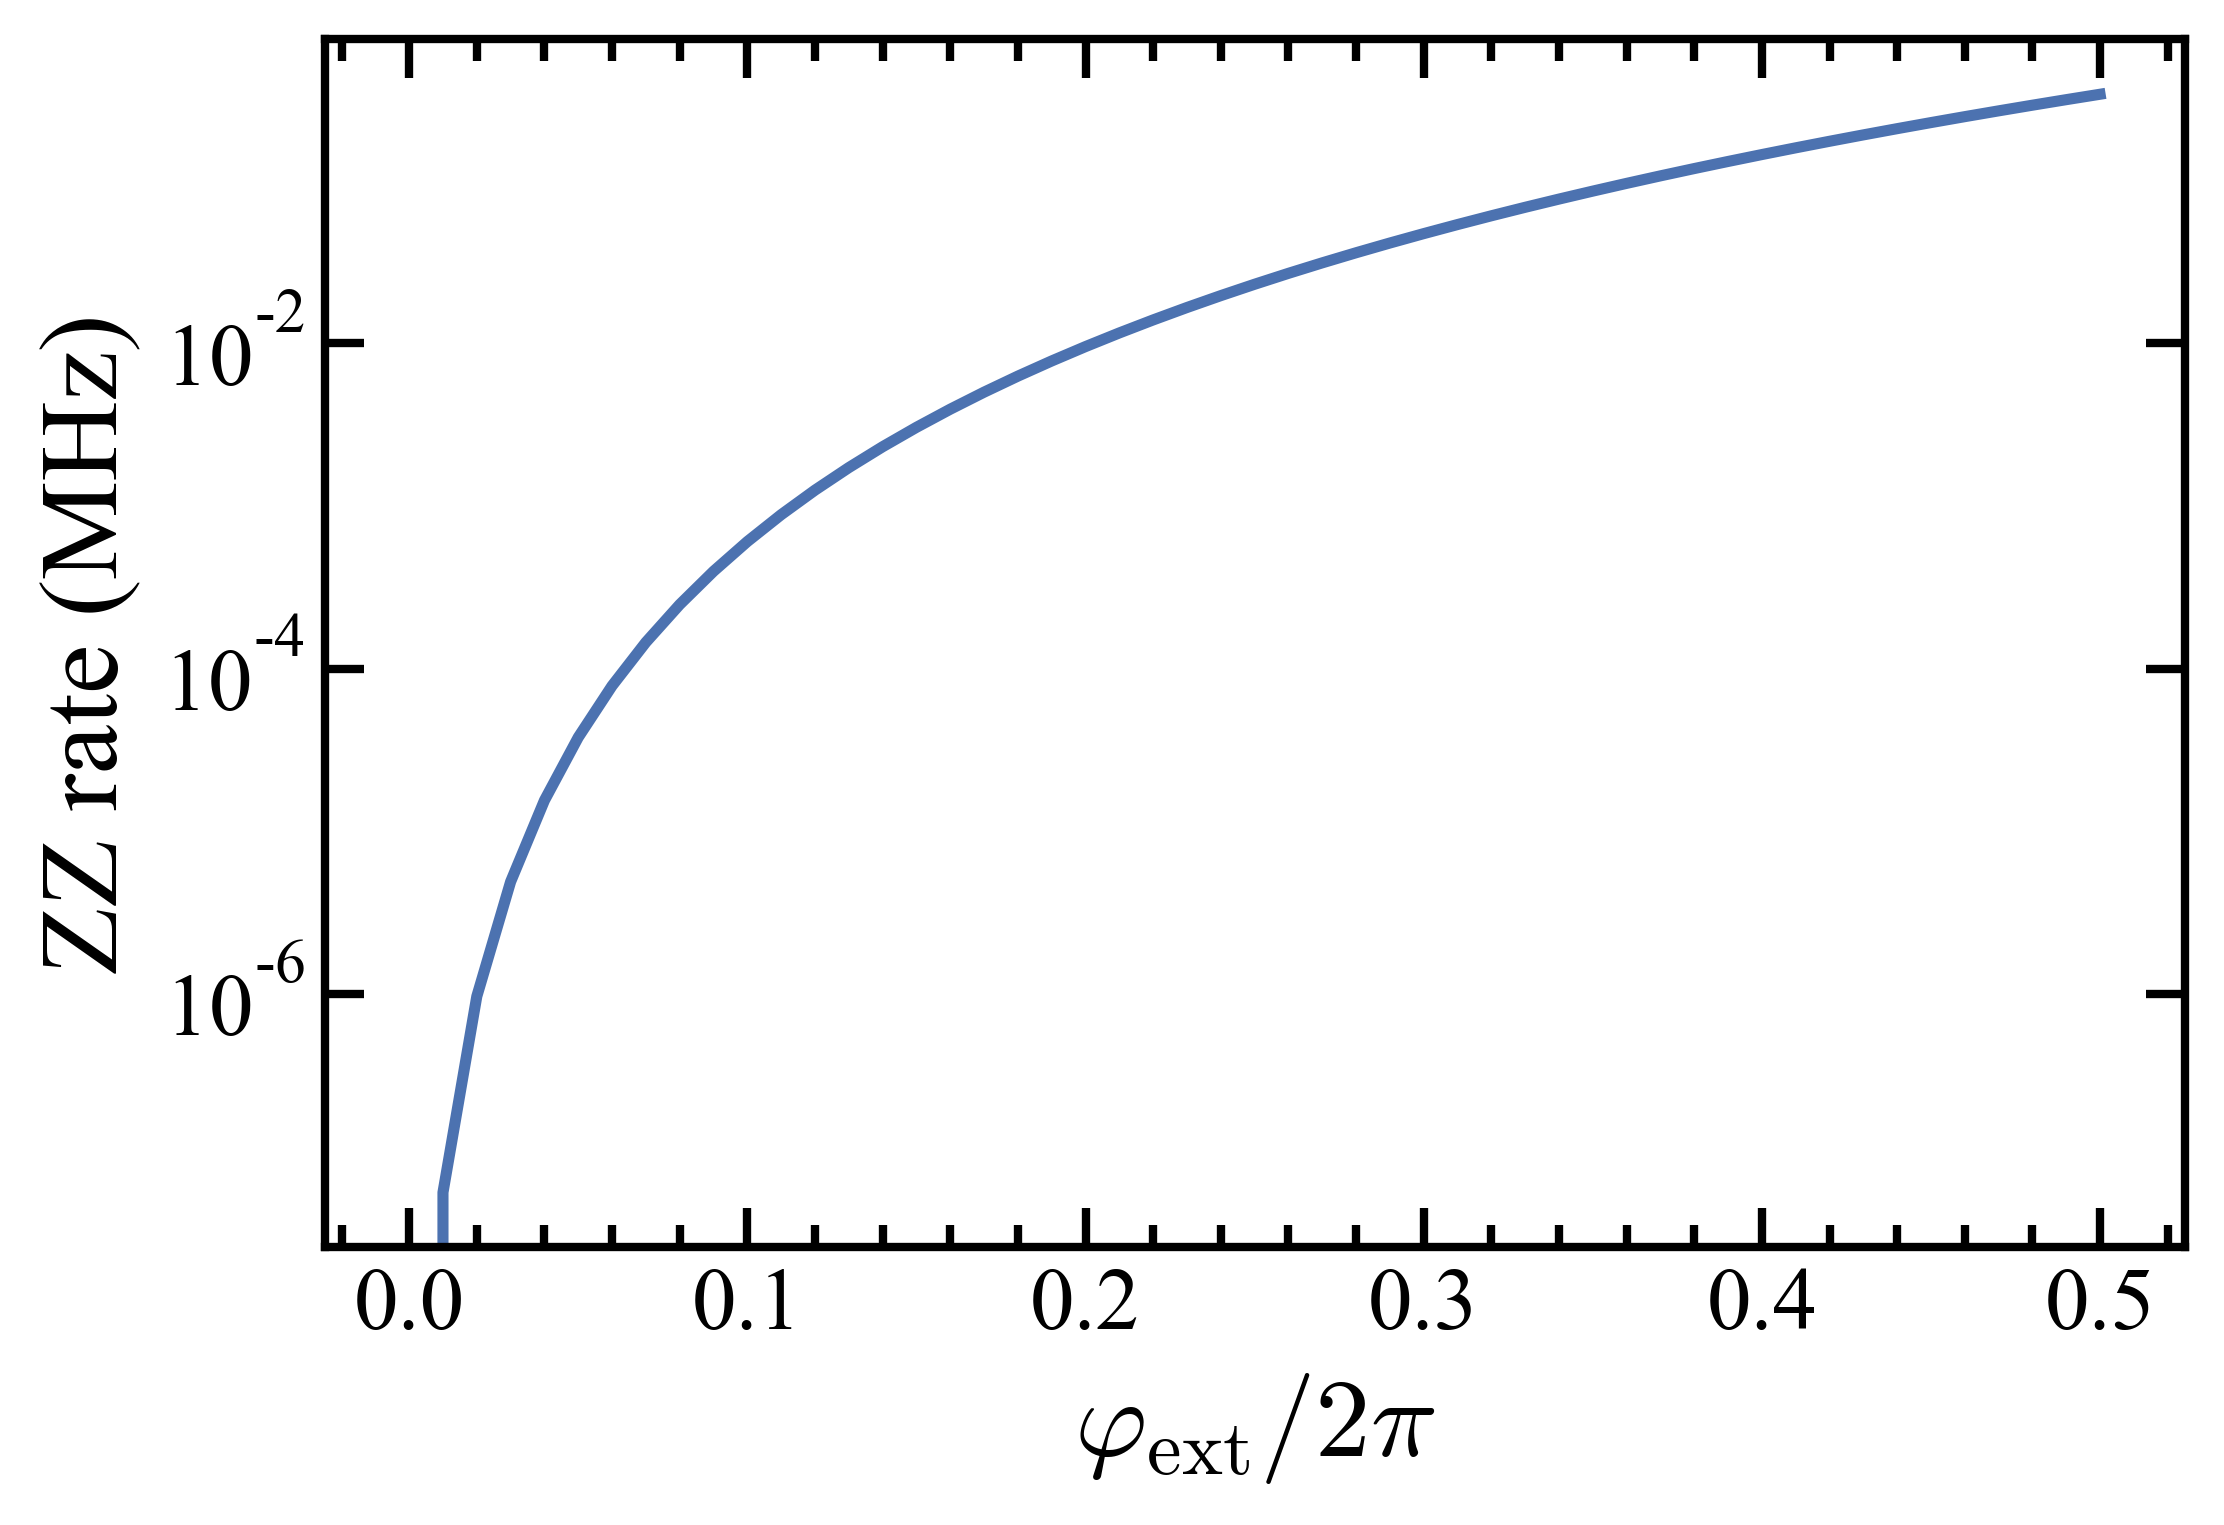

In [31]:
zeta_ZZ = energies[system.level_label('110'),:] + energies[system.level_label('000'),:] \
- energies[system.level_label('100'), :] - energies[system.level_label('010'), :]

plt.plot(g_array, abs(zeta_ZZ)*1e3)
plt.yscale("log")
plt.ylabel("ZZ rate (MHz)")
plt.xlabel(r'$\varphi_\mathrm{ext}/2\pi$')

In [4]:
flux_array = np.linspace(0,1,201)
energies = np.zeros((nlev_single**3, len(flux_array)))

g = 0.2
for idx, phi_ext in enumerate(flux_array):
    coupler.phi_ext = phi_ext*2*np.pi
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, g, 'charge'],
                                    [qubit2, coupler, g, 'charge'])
    energies[:, idx] = system.levels()

(0.0, 5.0)

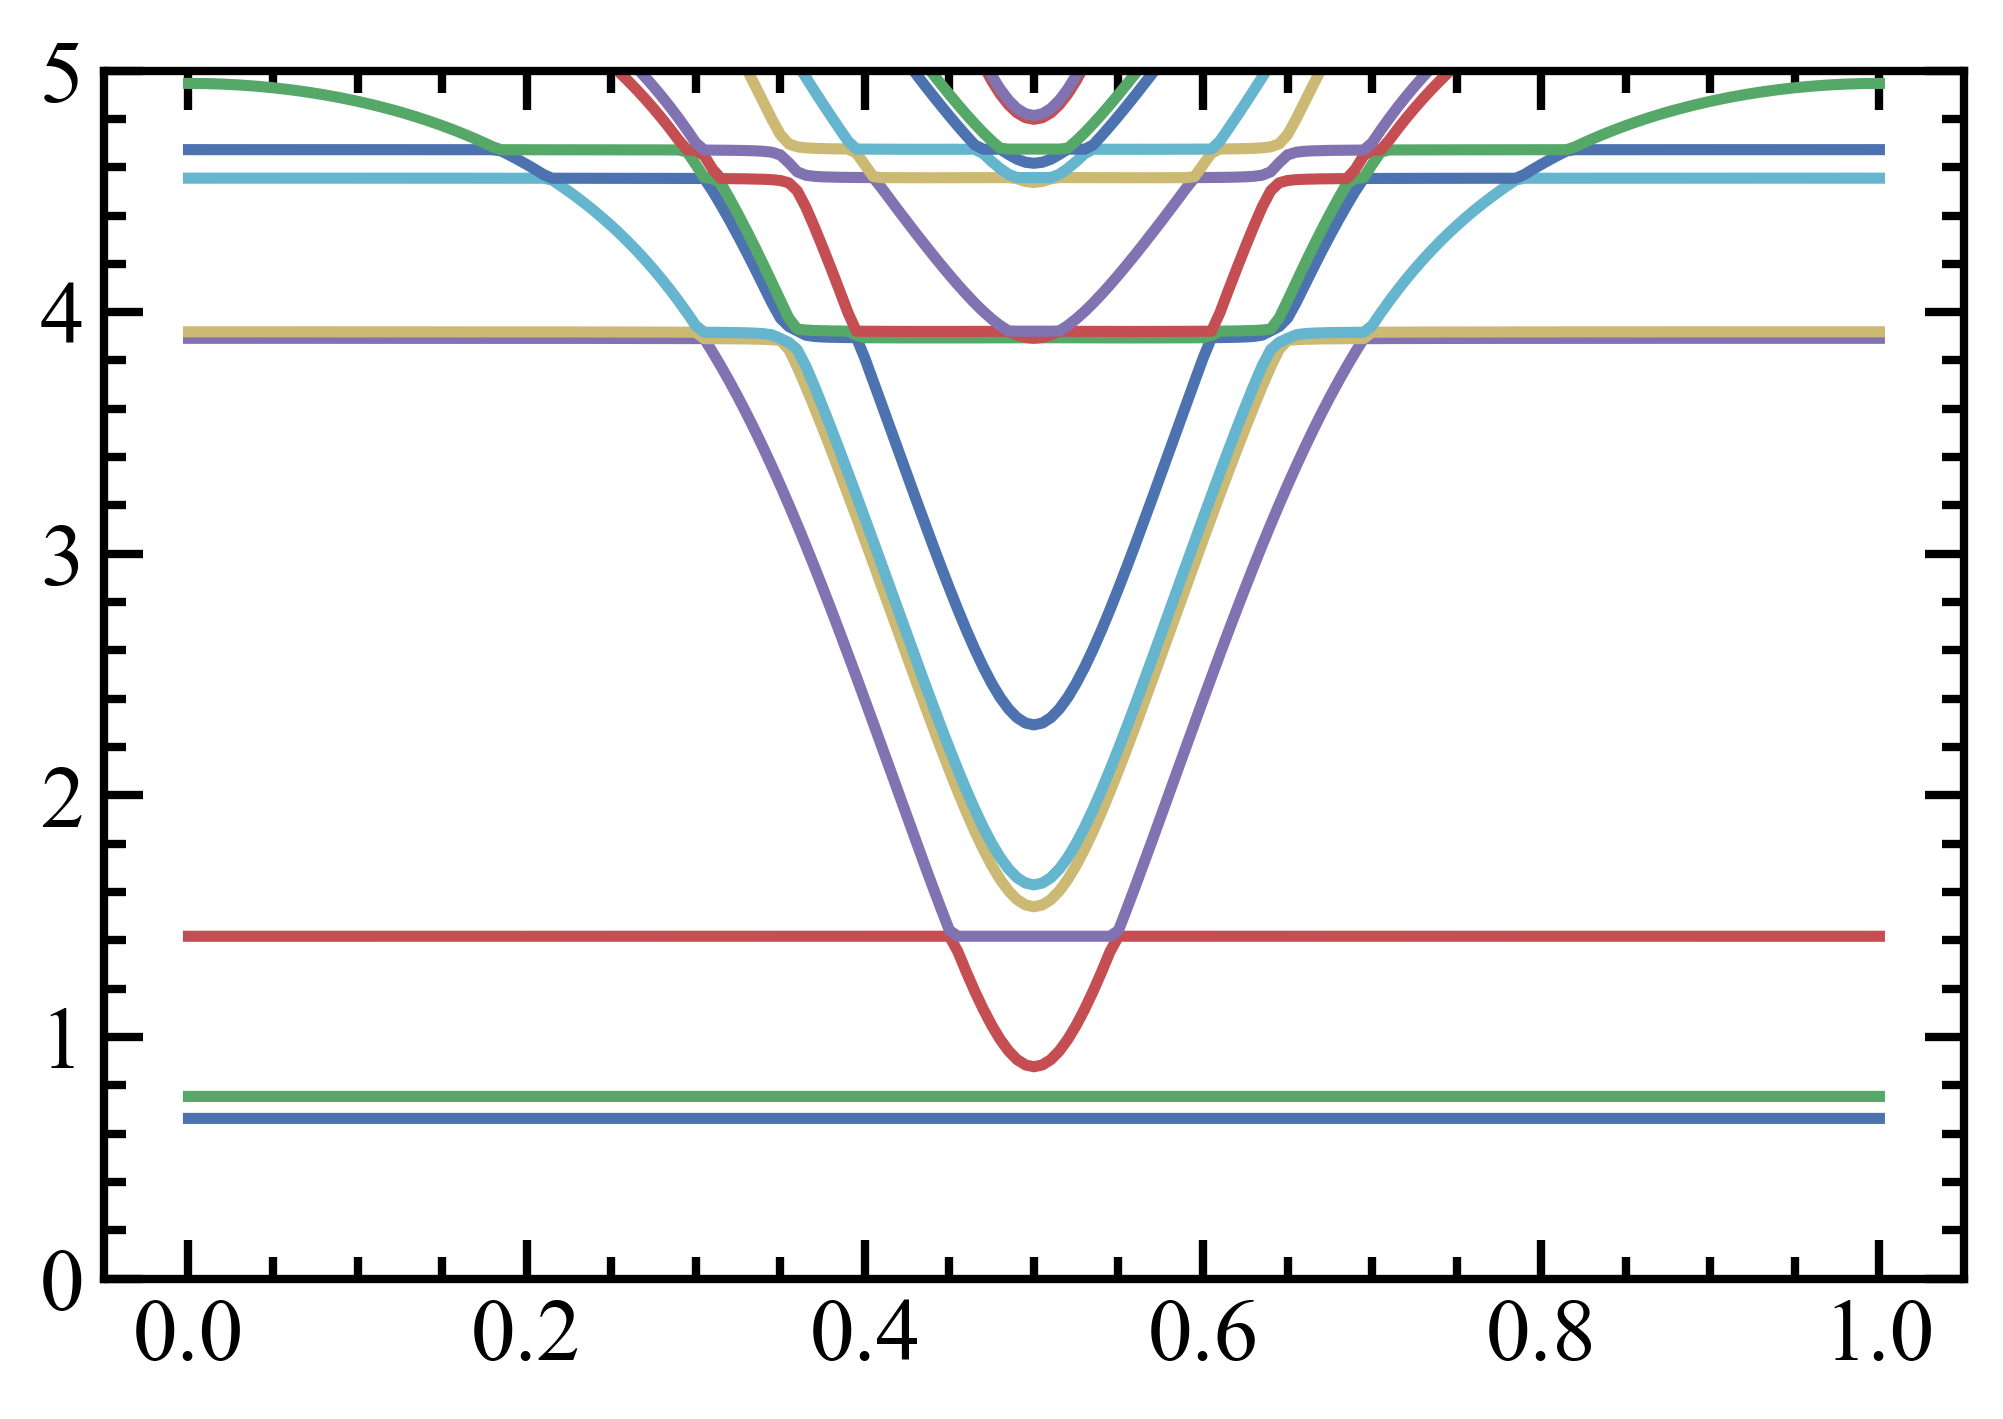

In [5]:
for idx in range(1,nlev_single**3):
    plt.plot(flux_array, energies[idx, :] - energies[0, :])
plt.ylim([0,5])

Text(0.5, 0, '$\\varphi_\\mathrm{ext}/2\\pi$')

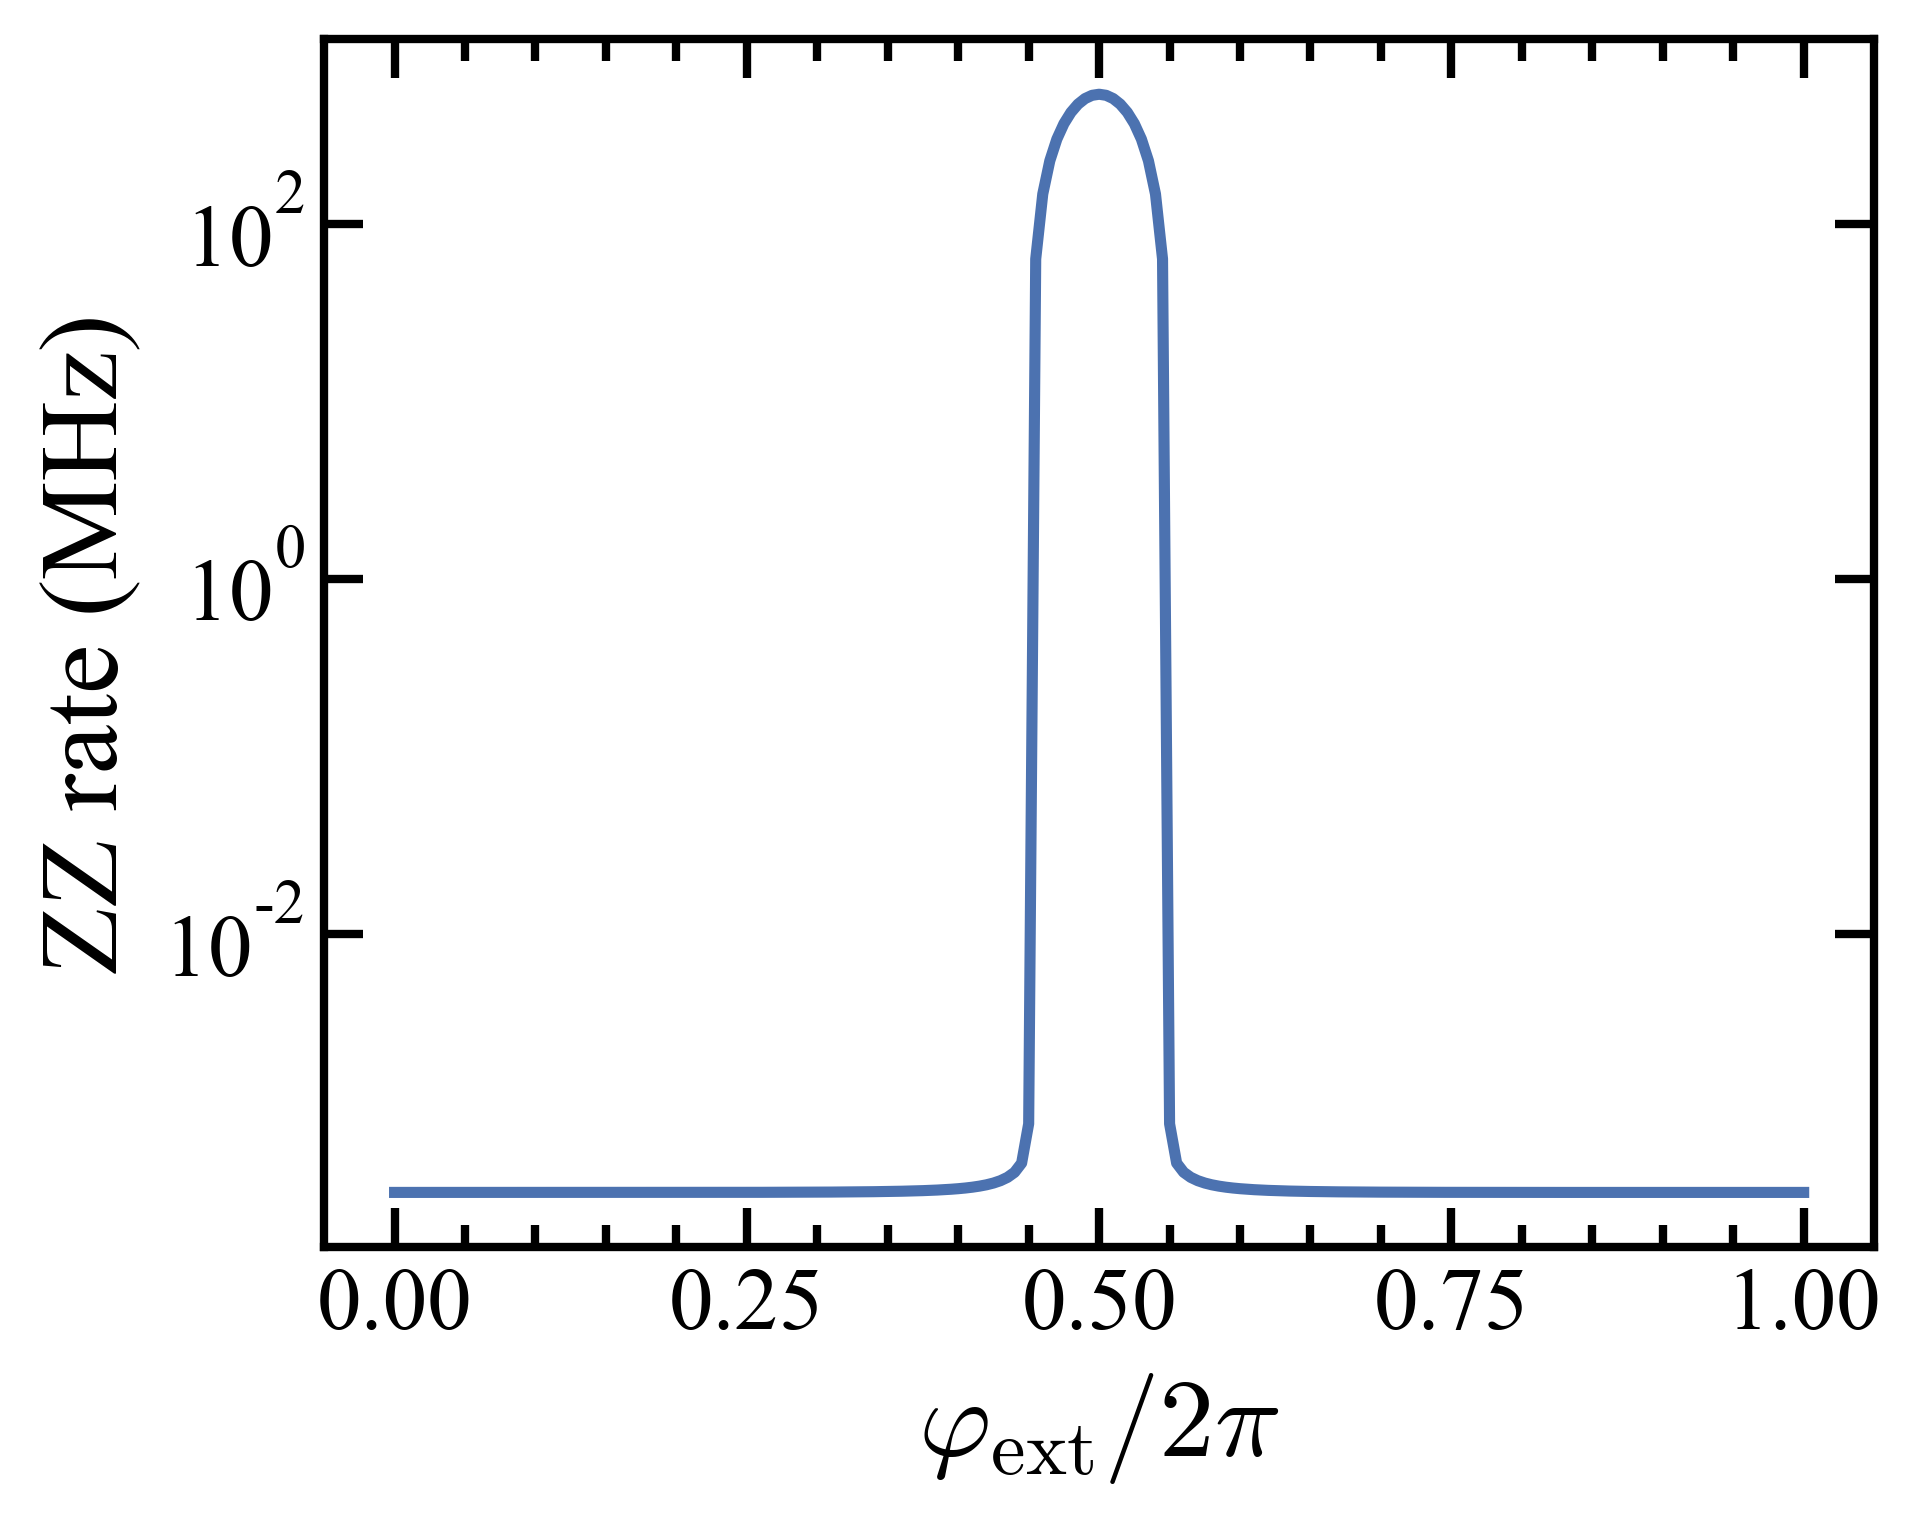

In [6]:
plt.figure(figsize = [5,4])
#zeta_ZZ has unit of GHz here
zeta_ZZ = energies[system.level_label('110'),:] + energies[system.level_label('000'),:] \
- energies[system.level_label('100'), :] - energies[system.level_label('010'), :]

plt.plot(flux_array, abs(zeta_ZZ)*1e3)
plt.yscale("log")
plt.ylabel("ZZ rate (MHz)")
plt.xlabel(r'$\varphi_\mathrm{ext}/2\pi$')